<html>
<font color = green size = 5>
<b> Exploratory Data Analysis - Data PreProcessing
</b>
</font>
</html>

<html>
<font color = blue size = 2>
author: Sulekha Aloorravi
</font>
</html>


### Contents:

1. Missing Values Treatment
2. Handling non numeric data
3. Data Transformations
4. Outlier Treatment
5. Multicollinearity and VIF

To begin with, let us import some of the basic libraries.

In [1]:
#Import Libraries
import pandas as pd
import numpy as np

%matplotlib inline 

import matplotlib
import matplotlib.pyplot as plt 

import warnings
warnings.filterwarnings('ignore')

We are going to load **Melbourne Housing Data Set** to perform a detailed Data preprocessing exercise.

Default NA values that are handled by pandas are as follows:

‘’, ‘#N/A’, ‘#N/A N/A’, ‘#NA’, ‘-1.#IND’, ‘-1.#QNAN’, ‘-NaN’, ‘-nan’, ‘1.#IND’, ‘1.#QNAN’, ‘N/A’, ‘NA’, ‘NULL’, ‘NaN’, ‘n/a’, ‘nan’, ‘null’.

Additionally, we have "inf","missing" in the dataset, which needs to be handled while loading the data.

In [2]:
Missing_Values = ["inf","missing"]

### Load dataset

In [3]:
df = pd.read_csv("Melbourne_housing_FULL.csv",low_memory=False,keep_default_na = True, na_values = Missing_Values)

In [4]:
df.head(5)

,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bedroom,...,Landsize,BuildingArea,YearBuilt,CouncilArea,Latitude,Longtitude,Regionname,Propertycount,ParkingArea,Price
0,Abbotsford,68 Studley St,2,h,SS,Jellis,3/9/2016,2.5,3067.0,2.0,...,126.0,NaN,NaN,Yarra City Council,-37.8014,144.9958,Northern Metropolitan,4019.0,Carport,NaN
1,Airport West,154 Halsey Rd,3,t,PI,Nelson,3/9/2016,13.5,3042.0,3.0,...,303.0,225.0,2016.0,Moonee Valley City Council,-37.7180,144.8780,Western Metropolitan,3464.0,Detached Garage,840000.0
2,Albert Park,105 Kerferd Rd,2,h,S,hockingstuart,3/9/2016,3.3,3206.0,2.0,...,120.0,82.0,1900.0,Port Phillip City Council,-37.8459,144.9555,Southern Metropolitan,3280.0,Attached Garage,1275000.0
3,Albert Park,85 Richardson St,2,h,S,Thomson,3/9/2016,3.3,3206.0,2.0,...,159.0,NaN,NaN,Port Phillip City Council,-37.8450,144.9538,Southern Metropolitan,3280.0,Indoor,1455000.0
4,Alphington,30 Austin St,3,h,SN,McGrath,3/9/2016,6.4,3078.0,3.0,...,174.0,122.0,2003.0,Darebin City Council,-37.7818,145.0198,Northern Metropolitan,2211.0,Parkade,NaN


In [5]:
df.dtypes

Suburb            object
Address           object
Rooms              int64
Type              object
Method            object
SellerG           object
Date              object
Distance         float64
Postcode         float64
Bedroom          float64
Bathroom         float64
Car              float64
Landsize         float64
BuildingArea     float64
YearBuilt        float64
CouncilArea       object
Latitude         float64
Longtitude       float64
Regionname        object
Propertycount    float64
ParkingArea       object
Price            float64
dtype: object

### Modify variables into their correct datatypes

In [6]:
df['Date'] = pd.to_datetime(df['Date'])
df['Postcode'] = df['Postcode'].astype(object)
df['YearBuilt'] = df['YearBuilt'].astype(object)
df['Latitude'] = df['Latitude'].astype(object)
df['Longtitude'] = df['Longtitude'].astype(object)
df['Propertycount'] = df['Propertycount'].astype(int, errors = 'ignore')

In [7]:
df.dtypes

Suburb                   object
Address                  object
Rooms                     int64
Type                     object
Method                   object
SellerG                  object
Date             datetime64[ns]
Distance                float64
Postcode                 object
Bedroom                 float64
Bathroom                float64
Car                     float64
Landsize                float64
BuildingArea            float64
YearBuilt                object
CouncilArea              object
Latitude                 object
Longtitude               object
Regionname               object
Propertycount           float64
ParkingArea              object
Price                   float64
dtype: object

### Glance summary statistics

In [8]:
df.describe()

,Rooms,Distance,Bedroom,Bathroom,Car,Landsize,BuildingArea,Propertycount,Price
count,34857.000000,34856.000000,26640.000000,26631.000000,26129.000000,23047.000000,13742.00000,34854.000000,2.724700e+04
mean,3.031012,11.184929,3.084647,1.624798,1.728845,593.598993,160.25640,7572.888306,1.050173e+06
std,0.969933,6.788892,0.980690,0.724212,1.010771,3398.841946,401.26706,4428.090313,6.414671e+05
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,83.000000,8.500000e+04
25%,2.000000,6.400000,2.000000,1.000000,1.000000,224.000000,102.00000,4385.000000,6.350000e+05
50%,3.000000,10.300000,3.000000,2.000000,2.000000,521.000000,136.00000,6763.000000,8.700000e+05
75%,4.000000,14.000000,4.000000,2.000000,2.000000,670.000000,188.00000,10412.000000,1.295000e+06
max,16.000000,48.100000,30.000000,12.000000,26.000000,433014.000000,44515.00000,21650.000000,1.120000e+07


<html>
<font color = Blue size = 4>
<b> Missing Values Treatment
</b>
</font>
</html>

Let us have a look at the missing data first.

In [9]:
missing_values=df.columns[df.isnull().any()]
df[missing_values].isnull().sum()

Distance             1
Postcode             1
Bedroom           8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Latitude          7976
Longtitude        7976
Propertycount        3
Price             7610
dtype: int64

In [10]:
df[df.isnull().any(axis=1)][missing_values].head()

,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Latitude,Longtitude,Propertycount,Price
0,2.5,3067,2.0,1.0,1.0,126.0,NaN,NaN,Yarra City Council,-37.8014,144.996,4019.0,NaN
3,3.3,3206,2.0,1.0,0.0,159.0,NaN,NaN,Port Phillip City Council,-37.845,144.954,3280.0,1455000.0
4,6.4,3078,3.0,2.0,1.0,174.0,122.0,2003,Darebin City Council,-37.7818,145.02,2211.0,NaN
6,6.4,3078,3.0,2.0,2.0,208.0,NaN,2013,Darebin City Council,-37.7854,145.032,2211.0,1110000.0
8,11.1,3025,3.0,1.0,1.0,620.0,108.0,1950,Hobsons Bay City Council,-37.829,144.848,5132.0,NaN


Missing data might mislead our analysis. To avoid issues in analysing the data, we might need to impute it using one of the below methods.

### Method1: Delete

We can simply delete the missing values if the count of missing records is insignificant compared to the total number of records. Eg: only 2% of the records have missing values in a large dataset. 

In [11]:
df[df["Distance"].isnull()][missing_values].head(5)

,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Latitude,Longtitude,Propertycount,Price
12355,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,616000.0


In [12]:
df.dropna(subset= ['Distance'], inplace = True)

In [13]:
df[df["Distance"].isnull()][missing_values].head(5)

,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Latitude,Longtitude,Propertycount,Price


### Method 2: Replace with summary statistics

#### Replace with median

In [14]:
df[df["Bedroom"].isnull()][missing_values].head(5)

,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Latitude,Longtitude,Propertycount,Price
11,11.1,3025,NaN,NaN,NaN,NaN,NaN,NaN,Hobsons Bay City Council,NaN,NaN,5132.0,857500.0
17,11.0,3147,NaN,NaN,NaN,NaN,NaN,NaN,Boroondara City Council,NaN,NaN,3052.0,1820000.0
20,10.5,3034,NaN,NaN,NaN,NaN,NaN,NaN,Moonee Valley City Council,NaN,NaN,4502.0,1310000.0
32,9.2,3104,NaN,NaN,NaN,NaN,NaN,NaN,Boroondara City Council,NaN,NaN,7809.0,1450000.0
33,9.2,3104,NaN,NaN,NaN,NaN,NaN,NaN,Boroondara City Council,NaN,NaN,7809.0,1305000.0


In [15]:
df['Bedroom'] = df['Bedroom'].fillna(df['Bedroom'].median()).astype(int)

In [16]:
df[df["Bedroom"].isnull()][missing_values].head(5)

,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Latitude,Longtitude,Propertycount,Price


#### Replace with mean

In [17]:
df[df["Bathroom"].isnull()][missing_values].head(5)

,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Latitude,Longtitude,Propertycount,Price
11,11.1,3025,3,NaN,NaN,NaN,NaN,NaN,Hobsons Bay City Council,NaN,NaN,5132.0,857500.0
17,11.0,3147,3,NaN,NaN,NaN,NaN,NaN,Boroondara City Council,NaN,NaN,3052.0,1820000.0
20,10.5,3034,3,NaN,NaN,NaN,NaN,NaN,Moonee Valley City Council,NaN,NaN,4502.0,1310000.0
32,9.2,3104,3,NaN,NaN,NaN,NaN,NaN,Boroondara City Council,NaN,NaN,7809.0,1450000.0
33,9.2,3104,3,NaN,NaN,NaN,NaN,NaN,Boroondara City Council,NaN,NaN,7809.0,1305000.0


In [18]:
df['Bathroom'] = df['Bathroom'].fillna(df['Bathroom'].mean()).astype(int)

In [19]:
df[df["Bathroom"].isnull()][missing_values].head(5)

,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Latitude,Longtitude,Propertycount,Price


#### Replace with zero

In [20]:
df[df["Car"].isnull()][missing_values].head(5)

,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Latitude,Longtitude,Propertycount,Price
11,11.1,3025,3,1,NaN,NaN,NaN,NaN,Hobsons Bay City Council,NaN,NaN,5132.0,857500.0
17,11.0,3147,3,1,NaN,NaN,NaN,NaN,Boroondara City Council,NaN,NaN,3052.0,1820000.0
20,10.5,3034,3,1,NaN,NaN,NaN,NaN,Moonee Valley City Council,NaN,NaN,4502.0,1310000.0
32,9.2,3104,3,1,NaN,NaN,NaN,NaN,Boroondara City Council,NaN,NaN,7809.0,1450000.0
33,9.2,3104,3,1,NaN,NaN,NaN,NaN,Boroondara City Council,NaN,NaN,7809.0,1305000.0


In [21]:
df['Car'] = df['Car'].fillna(0).astype(int)

In [22]:
df[df["Car"].isnull()][missing_values].head(5)

,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Latitude,Longtitude,Propertycount,Price


### Method 3: Random replace

In [23]:
df[df["CouncilArea"].isnull()][missing_values].head(5)

,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Latitude,Longtitude,Propertycount,Price
10019,7.7,3124,3,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,825000.0
15180,5.1,3011,3,1,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,710000.0


In [24]:
df["CouncilArea"].fillna(lambda x: random.choice(df[df[column] != np.nan]["CouncilArea"]), inplace =True)

In [25]:
df[df["CouncilArea"].isnull()][missing_values].head(5)

,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Latitude,Longtitude,Propertycount,Price


Randomly replace missing data only if the variable is insignificant for model building.

### Method 4: Forward Filling

Fill NA with the value from previous cell

In [26]:
df["Landsize"].head(13)

0     126.0
1     303.0
2     120.0
3     159.0
4     174.0
5     853.0
6     208.0
7     352.0
8     620.0
9     592.0
10    533.0
11      NaN
12    305.0
Name: Landsize, dtype: float64

In [27]:
df["Landsize"].ffill().head(13)

0     126.0
1     303.0
2     120.0
3     159.0
4     174.0
5     853.0
6     208.0
7     352.0
8     620.0
9     592.0
10    533.0
11    533.0
12    305.0
Name: Landsize, dtype: float64

### Method 5: Backward Filling

Fill NA with the value from next cell

In [28]:
df["Landsize"].bfill().head(13)

0     126.0
1     303.0
2     120.0
3     159.0
4     174.0
5     853.0
6     208.0
7     352.0
8     620.0
9     592.0
10    533.0
11    305.0
12    305.0
Name: Landsize, dtype: float64

### Method 6: Using predictive model

This is an advanced method where we can train a regression or classification model using the available data and fill the missing values.

In [29]:
df[df["BuildingArea"].isnull()][missing_values].head(5)

,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Latitude,Longtitude,Propertycount,Price
0,2.5,3067,2,1,1,126.0,NaN,NaN,Yarra City Council,-37.8014,144.996,4019.0,NaN
3,3.3,3206,2,1,0,159.0,NaN,NaN,Port Phillip City Council,-37.845,144.954,3280.0,1455000.0
6,6.4,3078,3,2,2,208.0,NaN,2013,Darebin City Council,-37.7854,145.032,2211.0,1110000.0
11,11.1,3025,3,1,0,NaN,NaN,NaN,Hobsons Bay City Council,NaN,NaN,5132.0,857500.0
12,6.3,3143,2,1,1,305.0,NaN,NaN,Stonnington City Council,-37.8573,145.023,4836.0,NaN


In [30]:
df['BuildingArea']= df.apply( lambda x: 32.2790907910796 * x.Rooms - 2.423644449 * x.Distance + 0.765268645 * x.Bedroom \
                             + 43.42023608 * x.Bathroom + 15.06554273 * x.Car  - 68.91637997 \
            if np.isnan(x.BuildingArea) else x.BuildingArea, axis=1)
df['BuildingArea'] = df['BuildingArea'].astype(int)

In [31]:
df[df["BuildingArea"].isnull()][missing_values].head(5)

,Distance,Postcode,Bedroom,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Latitude,Longtitude,Propertycount,Price


<html>
<font color = Blue size = 4>
<b> Handling non-numeric data
</b>
</font>
</html>

Most of the machine learning models are designed to work on numeric data. Hence, we need to convert categorical text data into numerical data for model building.

### One Hot Encoding

One-Hot-Encoding is used to create dummry variables to replace the categories in a categorical variable into features of each category and represent it using 1 or 0 based on the presence or absence of the categorical value in the record.

#### Pandas Get_Dummies

This function does One-Hot-Encoding on categorical text

In [32]:
df_dummies= pd.get_dummies(df, prefix='Park', columns=['ParkingArea'])

In [33]:
df_dummies.head(5)

,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bedroom,...,Propertycount,Price,Park_Attached Garage,Park_Carport,Park_Detached Garage,Park_Indoor,Park_Outdoor Stall,Park_Parkade,Park_Parking Pad,Park_Underground
0,Abbotsford,68 Studley St,2,h,SS,Jellis,2016-03-09,2.5,3067,2,...,4019.0,NaN,0,1,0,0,0,0,0,0
1,Airport West,154 Halsey Rd,3,t,PI,Nelson,2016-03-09,13.5,3042,3,...,3464.0,840000.0,0,0,1,0,0,0,0,0
2,Albert Park,105 Kerferd Rd,2,h,S,hockingstuart,2016-03-09,3.3,3206,2,...,3280.0,1275000.0,1,0,0,0,0,0,0,0
3,Albert Park,85 Richardson St,2,h,S,Thomson,2016-03-09,3.3,3206,2,...,3280.0,1455000.0,0,0,0,1,0,0,0,0
4,Alphington,30 Austin St,3,h,SN,McGrath,2016-03-09,6.4,3078,3,...,2211.0,NaN,0,0,0,0,0,1,0,0


### Convert to number

#### sklearn LabelEncoder

This function converts categorical text into categorical numbers.

In [34]:
from sklearn.preprocessing import LabelEncoder

In [35]:
labelencoder = LabelEncoder()

In [36]:
df_dummies['RegionId'] = labelencoder.fit_transform(df_dummies.Regionname)

In [37]:
df_dummies['RegionId'].head(5)

0    2
1    6
2    5
3    5
4    2
Name: RegionId, dtype: int64

#### sklearn OneHotEncoder

This function does One-Hot-Encoding on categorical numbers

In [38]:
from sklearn.preprocessing import OneHotEncoder
hotencoder = OneHotEncoder()
encoded = hotencoder.fit_transform(df_dummies.RegionId.values.reshape(-1,1)).toarray()
encoded

array([[ 0.,  0.,  1., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  1.,  0.],
       [ 0.,  0.,  0., ...,  1.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  1., ...,  0.,  0.,  0.]])

Let us now add this back to df_dummies dataframe.

In [39]:
df_encoded = pd.DataFrame(encoded, columns = ["RegionId_"+str(int(i)) for i in range(encoded.shape[1])])

In [40]:
df_dummies = pd.concat([df_dummies, df_encoded], axis=1)

In [41]:
df_dummies.head(5)

,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bedroom,...,Park_Underground,RegionId,RegionId_0,RegionId_1,RegionId_2,RegionId_3,RegionId_4,RegionId_5,RegionId_6,RegionId_7
0,Abbotsford,68 Studley St,2.0,h,SS,Jellis,2016-03-09,2.5,3067,2.0,...,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,Airport West,154 Halsey Rd,3.0,t,PI,Nelson,2016-03-09,13.5,3042,3.0,...,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,Albert Park,105 Kerferd Rd,2.0,h,S,hockingstuart,2016-03-09,3.3,3206,2.0,...,0.0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,Albert Park,85 Richardson St,2.0,h,S,Thomson,2016-03-09,3.3,3206,2.0,...,0.0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,Alphington,30 Austin St,3.0,h,SN,McGrath,2016-03-09,6.4,3078,3.0,...,0.0,2.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


<html>
<font color = Blue size = 4>
<b> Data transformations
</b>
</font>
</html>

### Summary statistics

In [42]:
df.describe()

,Rooms,Distance,Bedroom,Bathroom,Car,Landsize,BuildingArea,Propertycount,Price
count,34856.000000,34856.000000,34856.000000,34856.000000,34856.000000,23047.000000,34856.000000,34854.000000,2.724600e+04
mean,3.031013,11.184929,3.064695,1.477364,1.295989,593.598993,108.733045,7572.888306,1.050189e+06
std,0.969947,6.788892,0.858102,0.686366,1.151889,3398.841946,259.303142,4428.090313,6.414735e+05
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-58.000000,83.000000,8.500000e+04
25%,2.000000,6.400000,3.000000,1.000000,0.000000,224.000000,48.000000,4385.000000,6.350000e+05
50%,3.000000,10.300000,3.000000,1.000000,1.000000,521.000000,94.000000,6763.000000,8.700000e+05
75%,4.000000,14.000000,3.000000,2.000000,2.000000,670.000000,144.000000,10412.000000,1.295000e+06
max,16.000000,48.100000,30.000000,12.000000,26.000000,433014.000000,44515.000000,21650.000000,1.120000e+07


### Kurtosis

Kurtosis describes the shape of a probability distribution. It is a measure of taildedness of the distribution.

**Positive Value** - denotes heavy tails or more data is distributed around the tails

**Negative Value** - denotes light tails or less data is distributed around the tails


In [43]:
df.kurtosis(numeric_only  = True)

Rooms                2.511549
Distance             3.585924
Bedroom             36.014655
Bathroom             5.782342
Car                 10.103809
Landsize         11580.162510
BuildingArea     24704.194210
Propertycount        0.890688
Price               13.096886
dtype: float64

In [44]:
import scipy.stats
scipy.stats.mstats.normaltest(df['Car'])

NormaltestResult(statistic=12693.08463412421, pvalue=0.0)

In [45]:
scipy.stats.kurtosis(df['Car'])

10.102187770982102

In [46]:
scipy.stats.kurtosistest(df['Car'])

KurtosistestResult(statistic=78.050233067300297, pvalue=0.0)

### Skewness

Skewness similar to Kurtosis describes the shape of a probability distribution. It is a measure of asymmetry of the distribution.

**Positive Skew** - denotes right tail is longer

**Negative Skew** - denotes left tail is longer


In [47]:
df.skew(numeric_only  = True)

Rooms              0.499087
Distance           1.503586
Bedroom            1.673977
Bathroom           1.693604
Car                1.395061
Landsize          96.022311
BuildingArea     145.374936
Propertycount      0.992100
Price              2.588924
dtype: float64

In [48]:
scipy.stats.skew(df['Car'])

1.3950010784564906

In [49]:
scipy.stats.skewtest(df['Car'])

SkewtestResult(statistic=81.24805075978324, pvalue=0.0)

In [50]:
def plot_skewness(column):
        skewed_data = pd.DataFrame(df[column])

        skewed_data.plot(kind="density",
                      figsize=(10,10),
                        xlim=(0,5))


        plt.vlines(skewed_data.mean(),     
                   ymin=0, 
                   ymax=1.4,
                   linewidth=5.0,
                   label = 'mean',
                   linestyles = 'dashdot',
                   color = 'blue'
                  )

        plt.vlines(skewed_data.median(),   
                   ymin=0, 
                   ymax=1.4, 
                   linewidth=2.0,
                   label = 'median',
                   color='red')

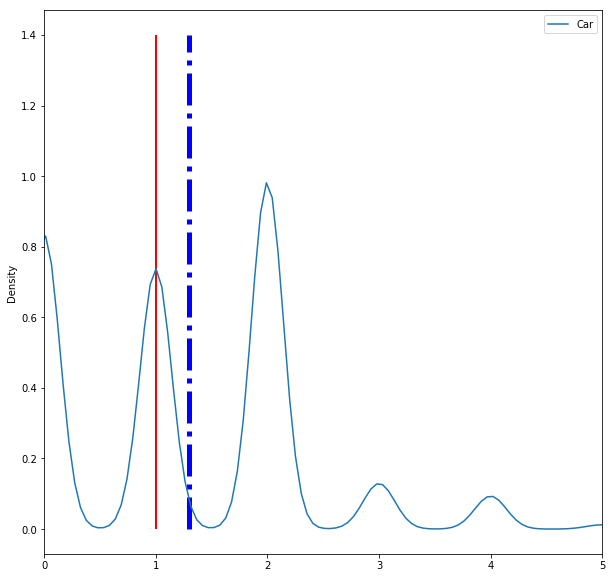

In [51]:
plot_skewness('Car')

The above data is multimodal which means that the variable is not normally distributed. 

It also indicates that the sample is not homogenous and the observations come in fact from two or more "overlapping" distributions.

Also, **mean** is to the right side of **median** making the data skewed to right.

**This data is not going to perform great on any model due to its skewness.
How are we going to handle this skewed data?**

The best way to fix it is to perform a transformation on the data, with the intent to reduce the skewness.

In data analysis transformation is the replacement of a variable by a function of that variable: for example, replacing a variable x by the square root of x or the logarithm of x. In a stronger sense, a transformation is a replacement that changes the shape of a distribution or relationship.

<html>
<font color = black size = 4>
<b>Normalization and Scaling
</b>
</font>
</html>

In this method, we convert variables with different scales of measurements into a single scale. 

**StandardScaler** normalizes the data using the formula (x-mean)/standard deviation

In [52]:
from sklearn.preprocessing import StandardScaler

In [53]:
std_scale = StandardScaler()

In [54]:
df['Bedroom_Stdscale'] = std_scale.fit_transform(df[['Bedroom']])

In [55]:
df['Bedroom_Stdscale'].head(5)

0   -1.240773
1   -0.075394
2   -1.240773
3   -1.240773
4   -0.075394
Name: Bedroom_Stdscale, dtype: float64

**MinMaxScaler** normalizes the data using the formula (x - min)/(max - min)

In [56]:
from sklearn.preprocessing import MinMaxScaler

In [57]:
minmax_scale = MinMaxScaler()

In [58]:
df['Car_MinMaxScale'] = minmax_scale.fit_transform(df[['Car']])

In [59]:
df['Car_MinMaxScale'].head(5)

0    0.038462
1    0.038462
2    0.000000
3    0.000000
4    0.038462
Name: Car_MinMaxScale, dtype: float64

**Log Transformation** 

We are going to write a custom transformer to perform log transformation

In [60]:
from sklearn.preprocessing import FunctionTransformer

In [61]:
log_transformer = FunctionTransformer(np.log1p)

In [62]:
df['Distance_logtransform'] = log_transformer.fit_transform(df[['Distance']])

In [63]:
df['Distance_logtransform'].head(5)

0    1.252763
1    2.674149
2    1.458615
3    1.458615
4    2.001480
Name: Distance_logtransform, dtype: float64

**Exponential Transformation** 

In [64]:
exp_transformer = FunctionTransformer(np.exp)

In [65]:
df['Bathroom_exptransform'] = exp_transformer.fit_transform(df[['Bathroom']])

In [66]:
df['Bathroom_exptransform'].head(5)

0    2.718282
1    7.389056
2    2.718282
3    2.718282
4    7.389056
Name: Bathroom_exptransform, dtype: float64

<html>
<font color = Blue size = 4>
<b>Outlier treatment
</b>
</font>
</html>

Outlier detection is the identification of items, events or observations which do not conform to an expected pattern or behavior
in comparison with other items in a given dataset.

Generally, observations larger than q3 + t or smaller than ql - t, whereby t = 1.5(q3 -ql), are regarded as outliers.

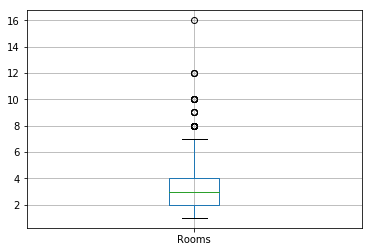

In [67]:
df[['Rooms']].boxplot()

In [68]:
q3 = df[['Rooms']].quantile(0.75).Rooms
q1 = df[['Rooms']].quantile(0.25).Rooms
t = q3-q1
outliers_above = q3+t
outliers_below = q1-t

In [69]:
outliers_above

6.0

In [70]:
outliers_below

0.0

In [71]:
df.loc[df.Rooms>6].count().Rooms

65

### Drop outliers

We can drop the outliers since it is only 65 records out of 34856 records

In [72]:
df_drop = df.copy(deep = True)
df_drop.loc[~ (df_drop['Rooms']>6)].head(5)

,Suburb,Address,Rooms,Type,Method,SellerG,Date,Distance,Postcode,Bedroom,...,Latitude,Longtitude,Regionname,Propertycount,ParkingArea,Price,Bedroom_Stdscale,Car_MinMaxScale,Distance_logtransform,Bathroom_exptransform
0,Abbotsford,68 Studley St,2,h,SS,Jellis,2016-03-09,2.5,3067,2,...,-37.8014,144.996,Northern Metropolitan,4019.0,Carport,NaN,-1.240773,0.038462,1.252763,2.718282
1,Airport West,154 Halsey Rd,3,t,PI,Nelson,2016-03-09,13.5,3042,3,...,-37.718,144.878,Western Metropolitan,3464.0,Detached Garage,840000.0,-0.075394,0.038462,2.674149,7.389056
2,Albert Park,105 Kerferd Rd,2,h,S,hockingstuart,2016-03-09,3.3,3206,2,...,-37.8459,144.956,Southern Metropolitan,3280.0,Attached Garage,1275000.0,-1.240773,0.000000,1.458615,2.718282
3,Albert Park,85 Richardson St,2,h,S,Thomson,2016-03-09,3.3,3206,2,...,-37.845,144.954,Southern Metropolitan,3280.0,Indoor,1455000.0,-1.240773,0.000000,1.458615,2.718282
4,Alphington,30 Austin St,3,h,SN,McGrath,2016-03-09,6.4,3078,3,...,-37.7818,145.02,Northern Metropolitan,2211.0,Parkade,NaN,-0.075394,0.038462,2.001480,7.389056


### Replace with Max

In [73]:
df_max = df.copy(deep = True)
df_max.loc[df_max.Rooms>6, 'Rooms'] = 6

In [74]:
df_max.loc[df_max.Rooms>6].count().Rooms

0

### Replace with Median

In [75]:
df_median = df.copy(deep = True)
median = df_median.loc[df_median.Rooms<=6, 'Rooms'].median()
median

3.0

In [76]:
df_median.loc[df_median.Rooms>6, 'Rooms'] = median

In [77]:
df_median.loc[df_median.Rooms>6].count().Rooms

0

### Replace with Mean

In [78]:
df_mean = df.copy(deep = True)
mean = df_mean.loc[df_mean.Rooms<=6, 'Rooms'].mean()
mean = np.round(mean)

In [79]:
df_mean.loc[df_mean.Rooms>6, 'Rooms'] = mean

In [80]:
df_mean.loc[df_mean.Rooms>6].count().Rooms

0

<html>
<font color = Blue size = 4>
<b>Multicollinearity and Variation Inflation Factor (VIF)
</b>
</font>
</html>

**Multicollinearity** - 
Multicollinearity happens when one or more of the independent variables are strongly correlated with each other. 
In such scenarios, we should use only one among correlated independent variables.

In [81]:
corr = df[['Rooms','Distance','Bedroom','Bathroom','Car','Landsize','BuildingArea','Propertycount','Price']].corr()

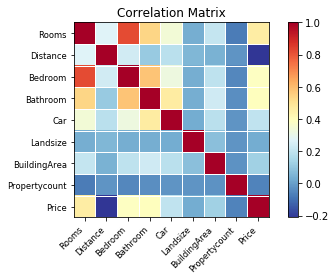

In [82]:
import statsmodels.graphics.api as smg
smg.plot_corr(corr, xnames=list(corr.columns))
plt.show()

From the above plot, we can see that **Rooms** variable has a strong positive correlation with **Bedroom** variable.

**Propertycount** has a negative correlation with all other variables.

**VIF** - is an indicator of the existence of multicollinearity. 

Let us now perform VIF analysis to remove multicollinearity.

In [83]:
predictor_variables = ['Rooms','Distance','Bedroom','Bathroom','Car','Landsize','BuildingArea','Propertycount']

In [84]:
df_predictor = df[predictor_variables].copy(deep = True)
df_predictor = df_predictor.dropna()

In [85]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
threshold = 90
for i in np.arange(0,len(predictor_variables)):
    vif = [variance_inflation_factor(df_predictor[predictor_variables].values, j) 
    for j in range(df_predictor[predictor_variables].shape[1])]
    maxindex = vif.index(max(vif))
    if max(vif) > threshold:
        print ("VIF :", vif)
        print('Eliminating \'' + df_predictor[predictor_variables].columns[maxindex] + '\' at index: ' + str(maxindex))
        del predictor_variables[maxindex]
    else:
        break

VIF : [95.700478605899875, 4.0333455623348247, 93.852403369564527, 9.7364435298183363, 4.4884188179088129, 1.0418735519833655, 1.2322453668291027, 3.0994817200651337]
Eliminating 'Rooms' at index: 0


In [86]:
predictor_variables

['Distance',
 'Bedroom',
 'Bathroom',
 'Car',
 'Landsize',
 'BuildingArea',
 'Propertycount']

We can see that VIF has eliminated 'Rooms' variable from the independent variables.

### ---Try to apply the above analysis for different datasets--- 